MAPE: 0.24610525230982733


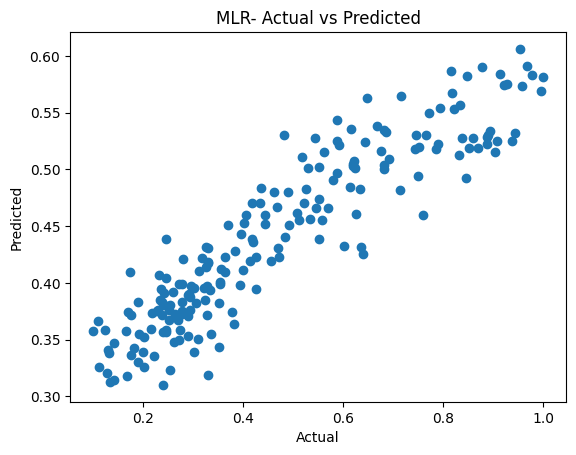

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt


learning_rate = 0.1
momentum = 0.8

training_data = pd.read_csv('../datasets/market_data.training.scaled.txt', sep='\t', skiprows=1)

X_train= training_data.iloc[:, :-1].values
y_train = training_data.iloc[:, -1].values

test_data = pd.read_csv('../datasets/market_data.test.scaled.txt', sep='\t', skiprows=1)
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

regressor = SGDRegressor(learning_rate="constant", eta0 = learning_rate, alpha=momentum, loss="squared_error")
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

train_sizes, train_scores, test_scores = learning_curve(regressor, X_train, y_train, cv=None, scoring='neg_mean_absolute_percentage_error')

train_mape = np.abs(train_scores).mean(axis=1)
test_mape = np.abs(test_scores).mean(axis=1)

print("MAPE:", train_mape[-1])


plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLR- Actual vs Predicted')
plt.show()
